## Import the libraries

In [1]:
import pandas as pd  
# For data manipulation and analysis
import numpy as np  
# For numerical operations
import seaborn as sns  
# For statistical data visualization
import matplotlib.pyplot as plt  
# For creating plots and visualizations
from scipy import stats  
# For statistical functions
from sklearn.naive_bayes import GaussianNB  
# Gaussian Naive Bayes classifier
from sklearn.preprocessing import LabelEncoder  
# For encoding categorical features
from sklearn.model_selection import train_test_split  
# For splitting data into training and testing sets
from sklearn.metrics import (
    accuracy_score,  
    # For calculating accuracy metrics
    confusion_matrix,  
    # For creating a confusion matrix
    f1_score,  
    # For calculating the F1 score
    classification_report  
    # For generating a classification report
)
from sklearn.model_selection import learning_curve  
# For plotting learning curves
from imblearn.under_sampling import RandomUnderSampler  
# For undersampling imbalanced data
from sklearn.tree import DecisionTreeClassifier  
# Decision Tree classifier
from sklearn.tree import plot_tree  
# For plotting decision trees
from sklearn import metrics  
# For various metrics and evaluation functions

## Read the dataset file

In [3]:
data = pd.read_csv(r"D:\VS code Programmes\ML\Sessions\#5FivthSession\magic04.csv")

## Data cleaning

In [4]:
# Step 1: Clean the data
# Remove rows with null values
data_cleaned = data.dropna()

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Step 2: Separate the numeric columns
# Assuming the last column is non-numeric
numeric_data = data_cleaned.iloc[:, :-1]  # All columns except the last one
non_numeric_data = data_cleaned.iloc[:, -1]  # The last column

# Step 3: Normalize the numeric data
# Normalize using Z-score
numeric_data_normalized = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Step 4: Remove outliers
# Calculate Z-scores for the numeric data
z_scores = np.abs(stats.zscore(numeric_data_normalized))

# Set a Z-score threshold (e.g., 3 standard deviations)
threshold = 3

# Identify non-outlier rows
non_outlier_indices = np.where(~(z_scores > threshold).any(axis=1))[0]

# Filter the numeric data and the last non-numeric column using non-outlier indices
numeric_data_filtered = numeric_data.iloc[non_outlier_indices]
non_numeric_data_filtered = non_numeric_data.iloc[non_outlier_indices]

# Step 5: Recombine the filtered data
data_filtered = pd.concat([numeric_data_filtered, non_numeric_data_filtered], axis=1)

# data_filtered now contains the cleaned, normalized data with outliers removed

## Drop the last column from the dataset and make it as independent variable 

In [5]:
feature_cols = [
    "col1",  # Renames the first column to "col1"
    "col2",  # Renames the second column to "col2"
    "col3",  # Renames the third column to "col3"
    "col4",  # Renames the fourth column to "col4"
    "col5",  # Renames the fifth column to "col5"
    "col6",  # Renames the sixth column to "col6"
    "col7",  # Renames the seventh column to "col7"
    "col8",  # Renames the eighth column to "col8"
    "col9",  # Renames the ninth column to "col9"
    "col10",  # Renames the tenth column to "col10"
    "result",  # Renames the eleventh column to "result" (the target column)
]

data_filtered.columns = feature_cols  # Assigns the feature_cols list as the new column names of data_filtered

# Splitting the data into features (X) and target (y)
x = data_filtered.drop(
    "result", axis=1
)  # Drops the target column "result" from the DataFrame to create x (features)
y = data_filtered["result"]  # Assigns the target column "result" to y (target variable)

## Balance the dataset 

In [6]:
print(y.value_counts())
# Prints the count of each class in the target variable `y` before applying under-sampling.
# This helps you see how imbalanced the classes are.

rus = RandomUnderSampler(sampling_strategy=1)
# Initializes a RandomUnderSampler object `rus`.
# The `sampling_strategy=1` argument specifies that the minority class will be resampled to have the same number of samples as the majority class,
# resulting in a perfectly balanced dataset.

x, y = rus.fit_resample(x, y)
# Applies the under-sampling to both the features `x` and the target `y`.
# `fit_resample` returns the resampled `x` and `y`, with the majority class reduced to match the size of the minority class.

print(y.value_counts())
# Prints the count of each class in the target variable `y` after applying under-sampling.
# This confirms that the classes have been balanced.

result
g    12190
h     5533
Name: count, dtype: int64
result
g    5533
h    5533
Name: count, dtype: int64


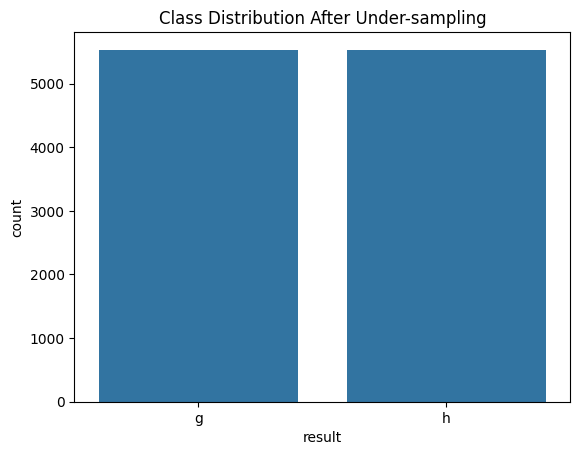

In [7]:
# Countplot after under-sampling
sns.countplot(x=y)
plt.title("Class Distribution After Under-sampling")
plt.show()

## Split the dataset into training and testing sets

In [8]:
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

## Perform Gaussian Naive Bayes classification

In [9]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

GaussianNB()

## Make Predictions and calculate the accuracy of the predictions

In [10]:
y_pred = model.predict(
    x_test
)  # Predicting the target variable using the trained model on x_test
accuracy = accuracy_score(
    y_pred, y_test
)  # Calculating the accuracy of the model's predictions
f1 = f1_score(y_pred, y_test, average="weighted")  # Calculating the weighted F1 score

print("Accuracy:", accuracy)  # Printing the accuracy
print("F1 Score:", f1)  # Printing the F1 score

report = classification_report(
    y_test, y_pred
)  # Generating a detailed classification report
print(report)  # Printing the classification report

Accuracy: 0.6849397590361446
F1 Score: 0.690998513443867
              precision    recall  f1-score   support

           g       0.65      0.82      0.72       831
           h       0.75      0.55      0.63       829

    accuracy                           0.68      1660
   macro avg       0.70      0.68      0.68      1660
weighted avg       0.70      0.68      0.68      1660



## Make the confusion matrix

Confusion Matrix: 
[[683 148]
 [375 454]]


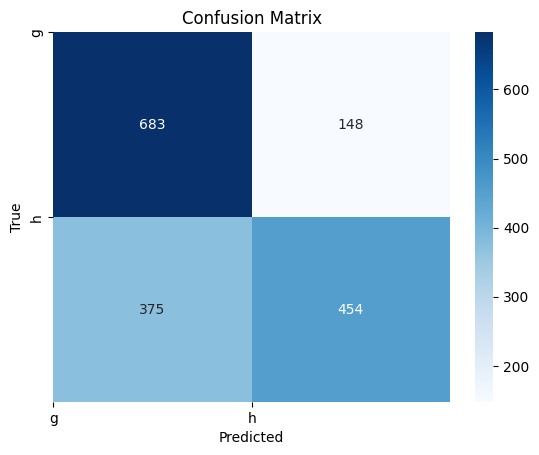

In [11]:
conf_matrix = confusion_matrix(
    y_test, y_pred
)  # Creating a confusion matrix to compare the true labels (y_test) with the predicted labels (y_pred)
print("Confusion Matrix: ")
print(conf_matrix)  # Printing the confusion matrix

# Encode target variable


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # More visually appealing



# Add labels to the confusion matrix
class_names = label_encoder.classes_


tick_marks = np.arange(len(class_names))


plt.xticks(tick_marks, class_names)


plt.yticks(tick_marks, class_names)


plt.xlabel("Predicted")

plt.ylabel("True")

plt.title("Confusion Matrix")


plt.show()

## Visualization of Learning Curve

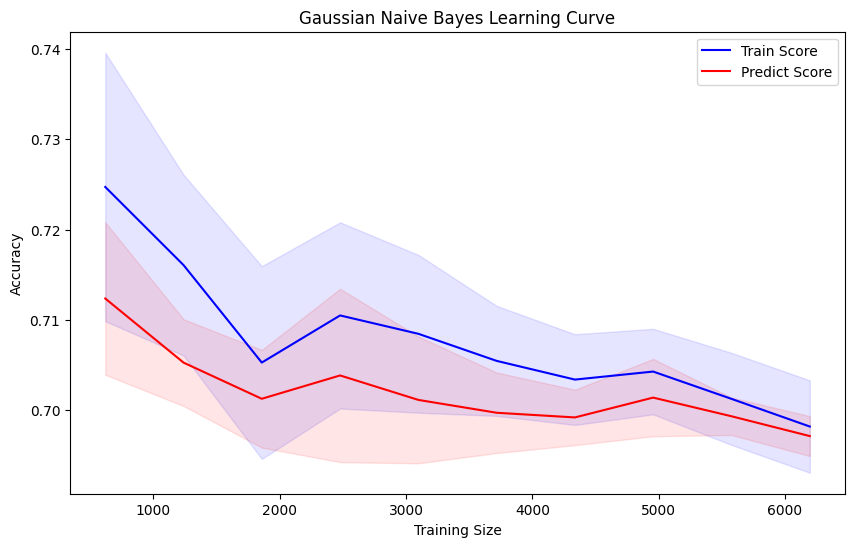

In [12]:
# Compute learning curve
sizes, train_scores, val_scores = learning_curve(
    GaussianNB(),  
    x_train,  # Use your training data
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
)

# Mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label="Train Score", color="blue")
plt.plot(sizes, val_mean, label="Predict Score", color="red")
plt.fill_between(
    sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Gaussian Naive Bayes Learning Curve")
plt.legend()
plt.show()

## Perform decision tree classification

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7855421686746988


## Visualization of decision tree classification

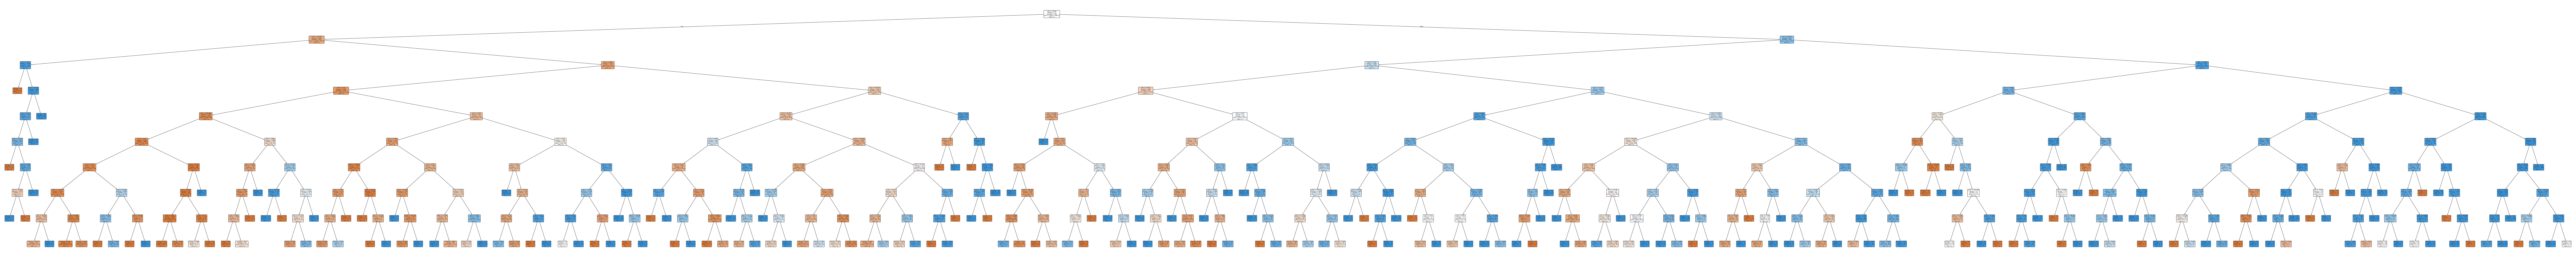

In [14]:
# Assuming `clf` is your trained decision tree classifier
plt.figure(figsize=(250, 25))
plot_tree(
    clf,
    filled=True,
    rounded=True,
    feature_names=[
        "col1",
        "col2",
        "col3",
        "col4",
        "col5",
        "col6",
        "col7",
        "col8",
        "col9",
        "col10",
    ],
    class_names=["g", "h"],
)
plt.show()

## Visualization of Learning Curve

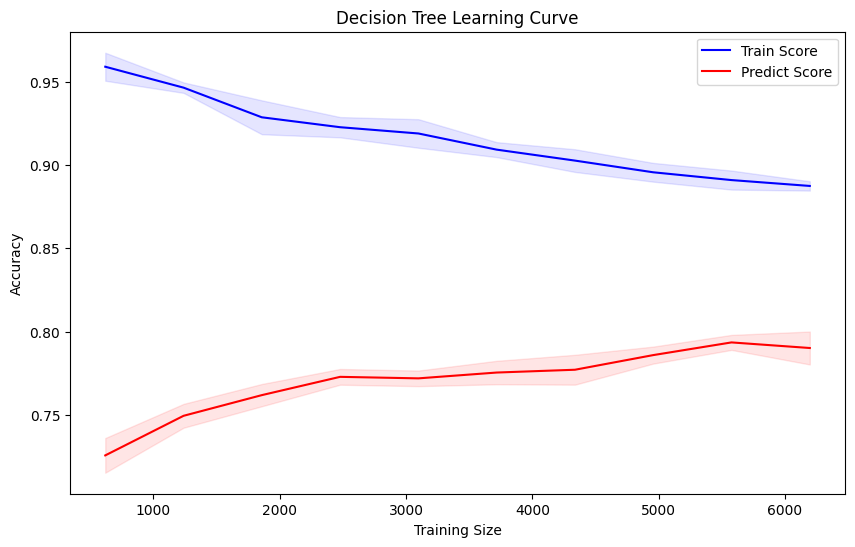

In [15]:
# Compute learning curve
sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(max_depth=9),  # Adjust n_neighbors as per your KNN setup
    x_train,  # Use your training data
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
)

# Mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label="Train Score", color="blue")
plt.plot(sizes, val_mean, label="Predict Score", color="red")
plt.fill_between(
    sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Decision Tree Learning Curve")
plt.legend()
plt.show()